<a href="https://colab.research.google.com/github/harshamalipatil16/0013/blob/main/w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = {
    'id':[1,2,3,4,5],
    'age':[25,30,30,-5,200],
    'gender': ['Male', 'male', 'Male', 'F', 'Unknown'],
    'Salary': [4000, None, 4000, 5000, -3000]
}
df = pd.DataFrame(data)
print(df)

   id  age   gender  Salary
0   1   25     Male  4000.0
1   2   30     male     NaN
2   3   30     Male  4000.0
3   4   -5        F  5000.0
4   5  200  Unknown -3000.0


In [ ]:
df.duplicated().sum()
df[df.duplicated()]

,Name,Age,City


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

count      5.000000
mean      56.000000
std       81.807701
min       -5.000000
25%       25.000000
50%       30.000000
75%       30.000000
max      200.000000
Name: age, dtype: float64


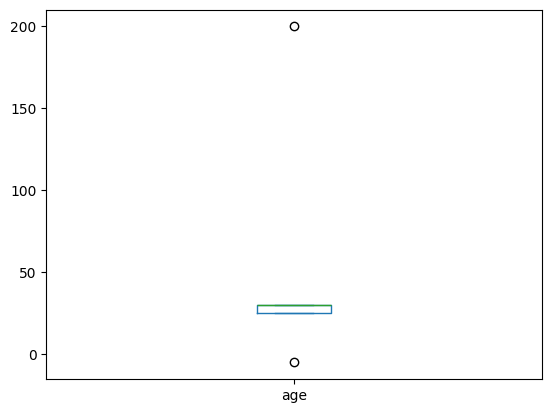

In [ ]:
print(df['age'].describe())

import matplotlib.pyplot as plt
df['age'].plot.box()
plt.show()

In [ ]:
print(df['gender'].value_counts())

df['gender'] = df['gender'].replace({'male': 'Male', 'F': 'Female', 'Unknown': None})

print(df[df['Salary'] < 0])

gender
Male       2
male       1
F          1
Unknown    1
Name: count, dtype: int64
   id  age gender  Salary
4   5  200   None -3000.0


In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,1
Salary,1


In [ ]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', None, 'Eve'],
    'Age': [25, None, 30, 22],
    'City': ['Delhi', 'Mumbai', 'Bangalore', None]
}

df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      float64
 2   City    3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


In [ ]:
print(df.isna())

    Name    Age   City
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True


In [ ]:
print(df.isna().sum())

Name    1
Age     1
City    1
dtype: int64


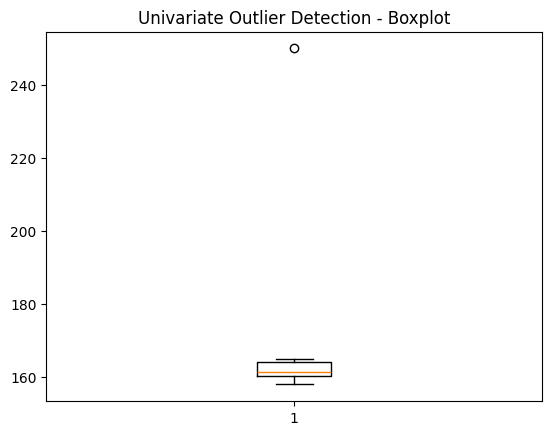

Outliers: [250]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.Series([160, 162, 158, 165, 161, 250])

plt.boxplot(data)
plt.title("Univariate Outlier Detection - Boxplot")
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
print("Outliers:", outliers.values)

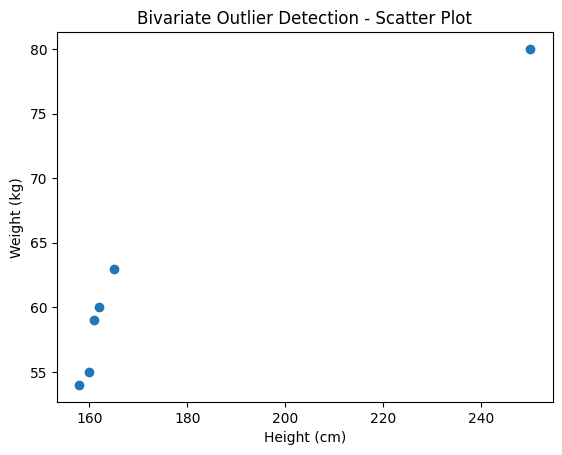

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

height = np.array([160, 162, 158, 165, 161, 250])
weight = np.array([55, 60, 54, 63, 59, 80])

plt.scatter(height, weight)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Bivariate Outlier Detection - Scatter Plot")
plt.show()

/tmp/ipython-input-3383813695.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2023-01-01', periods=12, freq='M')


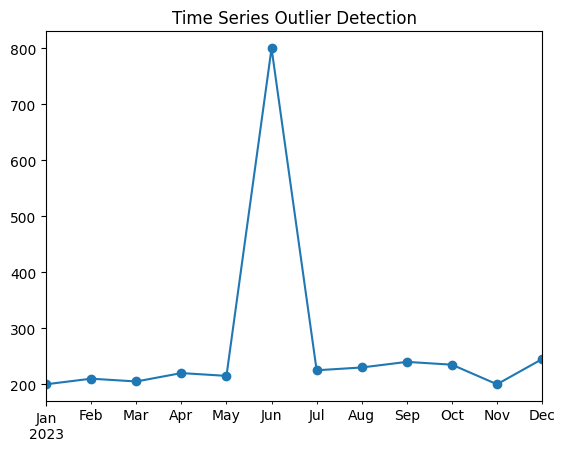

Outliers in time series:
 2023-06-30    800
Freq: ME, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales = pd.Series([200, 210, 205, 220, 215, 800, 225, 230, 240, 235,200, 245], index=dates)

sales.plot(marker='o', title="Time Series Outlier Detection")
plt.show()

mean = sales.mean()
std = sales.std()
outliers = sales[(sales > mean + 3*std) | (sales < mean - 3*std)]
print("Outliers in time series:\n", outliers)

In [ ]:
import pandas as pd
data = pd.Series([5, 6, 7, 8, 100])

lower_cap = data.quantile(0.05)
upper_cap = data.quantile(0.95)

capped_data = data.clip(lower=lower_cap, upper=upper_cap)
print(capped_data)

0     5.2
1     6.0
2     7.0
3     8.0
4    81.6
dtype: float64


In [ ]:
import numpy as np
data = pd.Series([10, 12, 15, 20, 200])
log_data = np.log(data)
print(log_data)

0    2.302585
1    2.484907
2    2.708050
3    2.995732
4    5.298317
dtype: float64


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

filtered_data = data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))]
print(filtered_data)

0    10
1    12
2    15
3    20
dtype: int64
